### Breve análise dos ativos


 Cotações:
              PETR4.SA  VVAR3.SA   BBDC4.SA
Date                                      
2020-05-20  19.299999      9.16  17.660000
2020-05-21  19.170000      9.45  18.700001
2020-05-22  18.670000      9.70  18.750000

 Evolução da carteira: 
              PETR4.SA   VVAR3.SA   BBDC4.SA   PORTFOLIO
Date                                                   
2016-01-04  33.333333  33.333333  33.333333  100.000000
2016-01-05  32.411448  34.722223  33.479612  100.613282
2016-01-06  31.052882  34.722223  33.005352   98.780457
2016-01-07  30.373603  32.777771  32.337470   95.488843
2016-01-08  30.422118  32.777771  31.704800   94.904689 



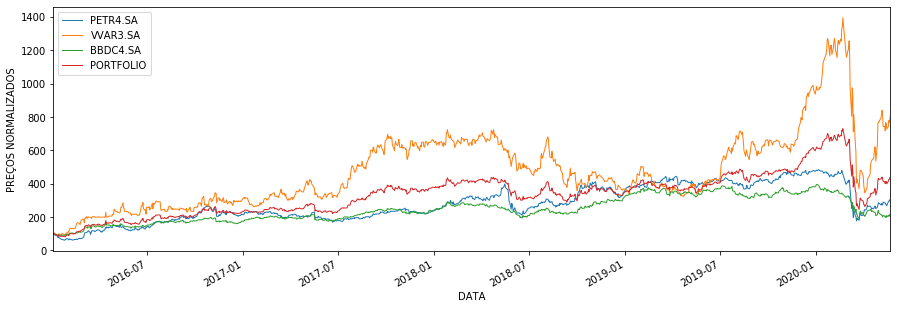


 Retornos diários: 
             PETR4.SA  VVAR3.SA  BBDC4.SA  PORTFOLIO
Date                                               
2016-01-05 -0.027657  0.041667  0.004388   0.006133
2016-01-06 -0.041916  0.000000 -0.014166  -0.018694
2016-01-07 -0.021875 -0.056000 -0.020236  -0.032704
2016-01-08  0.001597  0.000000 -0.019565  -0.005989
2016-01-11 -0.028708 -0.067796 -0.028273  -0.041593 



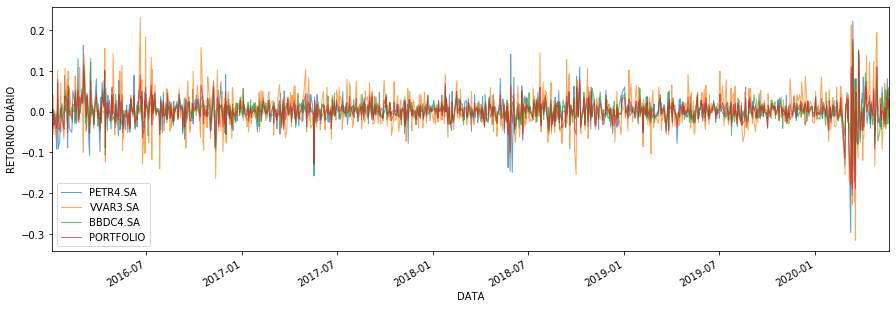

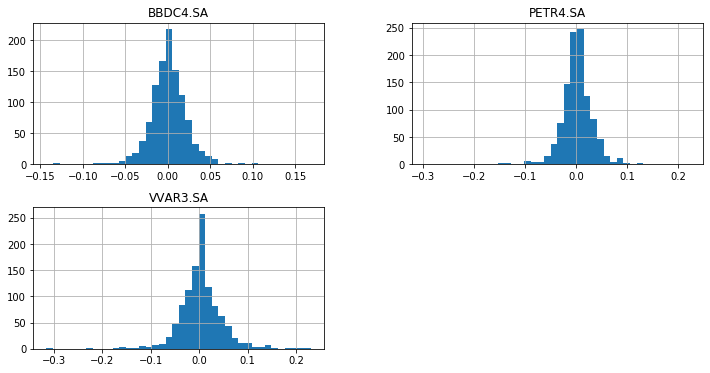


A volatilidade do portfólio no período foi de 0.0274  


O retorno anual médio do portfólio no período é de 46.47 % 



In [1]:
# Bibliotecas
from pandas_datareader import data as wb
from tabulate import tabulate
from scipy.stats import norm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Ações do Exercício
TickerA='PETR4.SA'
TickerB='VVAR3.SA'
TickerC='BBDC4.SA'
tickers = [TickerA, TickerB, TickerC]

# Preços de fechamento ajustados dos ativos da carteira dada
precos = pd.DataFrame()
pesos = np.array([1/3,1/3,1/3])
for t in tickers:
    precos[t]=wb.DataReader(t, data_source='yahoo', start='2016-1-1')['Adj Close']

# Cálculos dos Preços normalizados, retornos, e volatilidade
preco_norm = (precos/precos.iloc[0]*100)
portfolio_norm = ((preco_norm * pesos).sum(axis=1)).rename("PORTFOLIO")
retornos_dia = precos.pct_change()
retorno_ano = (retornos_dia.mean() * 252 * pesos).sum()
retornos_portfolio = (retornos_dia * pesos).sum(axis = 1).rename("PORTFOLIO")
desvio_padrao = np.sqrt(np.dot(pesos.T,np.dot(retornos_dia.cov(), pesos))) # * np.sqrt(252)

print("\n Cotações:\n", precos.tail(3))

# Gráfico com preços normalizados (base 100)
print("\n Evolução da carteira: \n", (preco_norm*pesos).join(portfolio_norm).head(),"\n")
preco_norm.join(portfolio_norm).plot(figsize=(15,5), lw = 1)
plt.ylabel('PREÇOS NORMALIZADOS')
plt.xlabel('DATA')
plt.show()

# Retornos diários de cada ação e do portfólio
print("\n Retornos diários: \n",retornos_dia.join(retornos_portfolio).dropna().head(),"\n")
retornos_dia.join(retornos_portfolio).plot(figsize=(15,5), lw = 1, alpha = 0.7)
plt.legend(loc='lower left', fontsize=10)
plt.ylabel('RETORNO DIÁRIO')
plt.xlabel('DATA')
plt.show()
retornos_dia.hist(figsize=(12,6), bins = 40)
plt.show()

print("\nA volatilidade do portfólio no período foi de {}  \n".format(round(desvio_padrao, 4)))
print("\nO retorno anual médio do portfólio no período é de {} % \n".format(round(retorno_ano*100, 2)))

### Mensure o VaR e o ES de uma carteira que contém as ações VVAR3, PETR4 e BBDC4, com dados históricos desde 01/01/2016 (leve em consideração a correlação dos ativos). Método histórico e gaussiano. Considere um portfólio que é igualmente distribuído entre as ações.


 Média: 0.001842     Desvio Padrão: 0.027437 



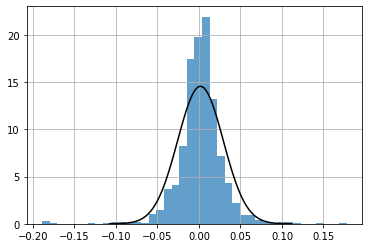


 Curva ajustada: Média = 0.00184,  Desvio padrão = 0.02742

 Resultados VaR: 

 Nível de confiança      Value at Risk
--------------------  ---------------
90%                        -0.03332
95%                        -0.043288
99%                        -0.0619864 


VaR a 95% de confiança para 252 dias será de: -68.718%



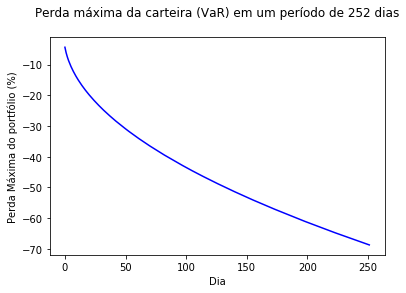


 Resultados ES: 

 Nível de confiança      Expected Shortfall
--------------------  --------------------
90%                             -0.0499946
95%                             -0.0584379
99%                             -0.074969 



In [2]:
# Cálculo do VaR de 1 dia com Método Gaussiano (Paramétrico/ Variância-Covariância)

# Média e desvio padrão dos retornos do portfólio
media = retornos_portfolio.mean()
desv_pad = retornos_portfolio.std()
print("\n Média: {}     Desvio Padrão: {} \n".format(round(media, 6), round(desv_pad, 6)))

# Histograma dos retornos
retornos_portfolio.hist(bins = 40, density = True,  histtype = 'stepfilled', alpha = 0.7)

# Curva normal ajustada
md, std = norm.fit(retornos_portfolio)
x = np.linspace(media - 4*desv_pad, media + 4*desv_pad, 100)
plt.plot(x, norm.pdf(x, md, std), "k")
plt.show()
print( "\n Curva ajustada: Média = %.5f,  Desvio padrão = %.5f" % (md, std))

# Cálculo dos Value at Risk para cada nível de confiança
VaR_90 = norm.ppf(1-0.9, media, desv_pad) #VaR_90 = media - desv_pad*norm.ppf(0.9)
VaR_95 = norm.ppf(1-0.95, media, desv_pad) #VaR_95 = media - desv_pad*norm.ppf(0.95)
VaR_99 = norm.ppf(1-0.99, media, desv_pad) #VaR_99 = media - desv_pad*norm.ppf(0.99)

print ("\n", "\033[1m" + "Resultados VaR:" + "\033[0m", "\n\n", tabulate([[' 90%', VaR_90],[' 95%', VaR_95],[' 99%', VaR_99]], headers=['Nível de confiança', 'Value at Risk']), "\n")

# Cálculando VaR para n dias
VaR_array = [] 
num_dias = 252        #int(input("Entre o número de dias: "))
VaR_local = VaR_95*100
for dia in range(1, num_dias+1):    
    VaR_array.append(np.round(VaR_local * np.sqrt(dia),2))
print ("\nVaR a 95% de confiança para " + str(dia) +" dias será de: " + str(round(VaR_local * np.sqrt(dia),3))+ "%\n")

# Construção do gráfico
plt.plot(VaR_array , "b" )
plt.xlabel("Dia")
plt.ylabel("Perda Máxima do portfólio (%)")
plt.title("Perda máxima da carteira (VaR) em um período de {} dias\n".format(num_dias)) 
plt.show()

# Cálculo dos Expected Shortfall para cada nível de confiança
ES_90 = -(media + desv_pad*norm.pdf(norm.ppf(0.9))/(1-0.9))
ES_95 = -(media + desv_pad*norm.pdf(norm.ppf(0.95))/(1-0.95))
ES_99 = -(media + desv_pad*norm.pdf(norm.ppf(0.99))/(1-0.99))

print ("\n", "\033[1m" + "Resultados ES:" + "\033[0m", "\n\n", tabulate([[' 90%', ES_90],[' 95%', ES_95],[' 99%', ES_99]], headers=['Nível de confiança', 'Expected Shortfall']), "\n")

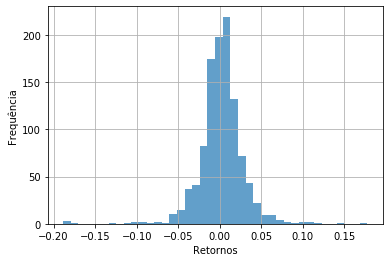


 Resultados VaR: 

 Nível de confiança      Value at Risk
--------------------  ---------------
90%                        -0.0253628
95%                        -0.0367273
99%                        -0.0793909 


VaR a 95% de confiança para 252 dias será de: -58.303%



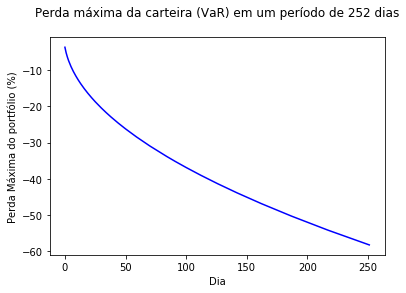


 Resultados ES: 

 Nível de confiança      Expected Shortfall
--------------------  --------------------
90%                             -0.0475929
95%                             -0.0638862
99%                             -0.130277 



In [3]:
# Cálculo do VaR de 1 dia pelo Método Histórico (usando quantil - divisores de dados)

# Histograma dos retornos
plt.hist(retornos_portfolio, bins = 40, alpha = 0.7)
plt.xlabel("Retornos")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()

# Retornos ordenados do menor para maior
ret_ordenado = retornos_portfolio.sort_values(ascending=True)

# Cálculo dos Value at Risk para cada nível de confiança
VaR_90 = ret_ordenado.quantile(0.1)
VaR_95 = ret_ordenado.quantile(0.05)
VaR_99 = ret_ordenado.quantile(0.01)

print ("\n", "\033[1m" + "Resultados VaR:" + "\033[0m", "\n\n", tabulate([[' 90%', VaR_90],[' 95%', VaR_95],[' 99%', VaR_99]], headers=['Nível de confiança', 'Value at Risk']), "\n")

# Cálculando VaR para n dias
VaR_array = [] 
num_dias = 252        #int(input("Entre o número de dias: "))
VaR_local = VaR_95*100
for dia in range(1, num_dias+1):    
    VaR_array.append(np.round(VaR_local * np.sqrt(dia),2))
print ("\nVaR a 95% de confiança para " + str(dia) +" dias será de: " + str(round(VaR_local * np.sqrt(dia),3))+ "%\n")

# Construção do gráfico
plt.plot(VaR_array , "b" )
plt.xlabel("Dia")
plt.ylabel("Perda Máxima do portfólio (%)")
plt.title("Perda máxima da carteira (VaR) em um período de {} dias\n".format(num_dias)) 
plt.show()

# Cálculo dos Expected Shortfall para cada nível de confiança
ES_90 = ret_ordenado[ret_ordenado<=ret_ordenado.quantile(0.1)].mean()
ES_95 = ret_ordenado[ret_ordenado<=ret_ordenado.quantile(0.05)].mean()
ES_99 = ret_ordenado[ret_ordenado<=ret_ordenado.quantile(0.01)].mean()

print ("\n", "\033[1m" + "Resultados ES:" + "\033[0m", "\n\n", tabulate([[' 90%', ES_90],[' 95%', ES_95],[' 99%', ES_99]], headers=['Nível de confiança', 'Expected Shortfall']), "\n")

### Realize 1000 projeções de Monte Carlo para 252 dias úteis a partir de 11/05/2020 dos preços da PETR4 utilizando o Movimento Browniano Geométrico, calibrado para a média e volatilidade histórica dos últimos 84 dias de negociação.  Utilize a simulação para calcular o VAR do ativo para 99% de confiança.

No handles with labels found to put in legend.


Date
2020-01-09    30.398355
2020-01-10    30.268362
2020-01-13    30.328358
2020-01-14    29.998377
2020-01-15    29.548399
Name: Adj Close, dtype: float64


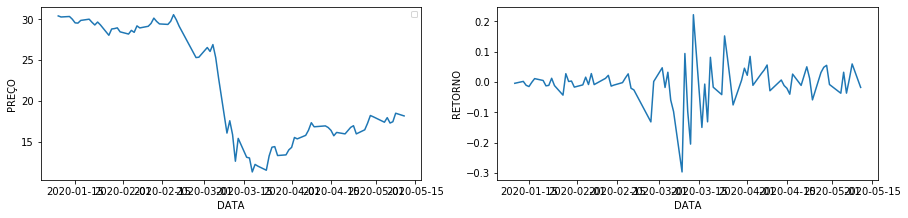


 Foram realizadas 1000 simulações com:
 - Média: -0.003957 
 - Variância: 0.004531 
 - Volatilidade: 0.067312 
 - Drift: -0.006222  
 


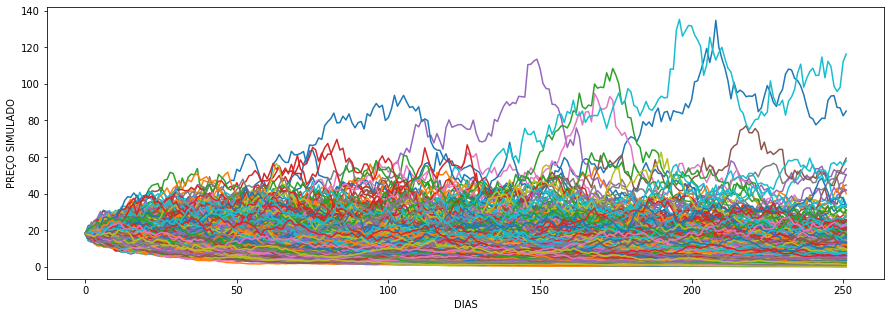



O VaR para 252 dias com PETR4, de acordo com a simulação é de: -98.377 %



In [4]:
# Preço de fechamento ajustado dos 84 últimos dias de negociação de PETR4
petr4 = wb.DataReader(TickerA,data_source='yahoo', start='2020-1-9', end = '2020-5-11')['Adj Close']
print(petr4.head())
ret_petro = petr4.pct_change()

# Gráfico com preços PETR4 e Retornos diários de PETR4 no período
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
plt.plot(petr4)
plt.xlabel('DATA')
plt.ylabel('PREÇO')
plt.legend(fontsize = 8)
plt.axis('tight')

plt.subplot(2,2,2)
plt.plot(ret_petro)
plt.xlabel('DATA')
plt.ylabel('RETORNO')
plt.show()

# Simulação de Monte Carlo com Movimento Browniano dos retornos de PETR4 no período
tempo_previsao = 252   # tempo que buscamos prever em dias
iteracoes = 1000
media = ret_petro.mean()
variancia = ret_petro.var()
desv_pad = ret_petro.std()
drift = media - 0.5 * variancia

prev_retornos = np.exp(np.array(drift) + np.array(desv_pad) * norm.ppf(np.random.rand(tempo_previsao, iteracoes)))
prev_precos = np.zeros_like(prev_retornos)
prev_precos[0] = petr4.iloc[-1]

for t in range(1, tempo_previsao):
    prev_precos[t] = prev_precos[t-1] * prev_retornos[t]

print("\n Foram realizadas {} simulações com:\n - Média: {} \n - Variância: {} \n - Volatilidade: {} \n - Drift: {}  \n ".format(iteracoes, round(media, 6), round(variancia, 6), round(desv_pad, 6), round(drift, 6)))

plt.figure(figsize=(15,5))
plt.plot(prev_precos)
plt.ylabel('PREÇO SIMULADO')
plt.xlabel('DIAS')
plt.show()

resultado = pd.DataFrame(prev_precos)
preco_VaR = resultado.iloc[-1].sort_values(ascending = True).iloc[9] # Décimo pior resultado (1%)

VaR_99_MC = (preco_VaR - petr4.iloc[-1])/petr4.iloc[-1]
print("\n\nO VaR para 252 dias com PETR4, de acordo com a simulação é de:", round(VaR_99_MC*100, 3), "%\n")

### Discuta como melhorar a performance do portfolio, utilizando o índice sharpe e o MPT, mudando apenas o tamanho das posições. Mostre e elabore sobre o resultado obtido.

In [5]:
# Cálculo do índice Sharpe (considerando a taxa livre de risco = 4% a.a.)
taxa = 0.04
taxa_dia = (1+taxa)**(1/252)-1
Sharpe = (retornos_portfolio.mean()-taxa_dia)/retornos_portfolio.std()
print('\nÍndice Sharpe (D): ' + str(Sharpe))

A_Sharpe = (252**0.5)*Sharpe
print('\nÍndice Sharpe Anualizado: ' + str(A_Sharpe))


Índice Sharpe (D): 0.061478866662388304

Índice Sharpe Anualizado: 0.9759467524486741


   Retornos  Volatilidade  Sharpe Ratio  Peso PETR4.SA  Peso VVAR3.SA  \
0  0.565340      0.512777      1.102506       0.462913       0.511562   
1  0.463131      0.436280      1.061545       0.101450       0.405323   
2  0.500104      0.460047      1.087073       0.159702       0.464909   
3  0.521631      0.476432      1.094870       0.173255       0.505544   
4  0.462625      0.436344      1.060231       0.094100       0.406421   

   Peso BBDC4.SA  
0       0.025525  
1       0.493227  
2       0.375389  
3       0.321201  
4       0.499480   



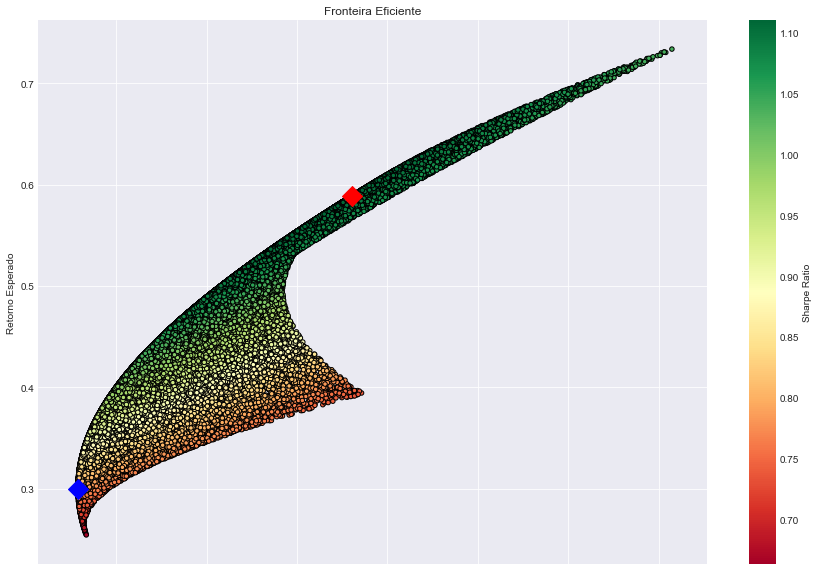


                    8174
Retornos       0.300055
Volatilidade   0.378924
Sharpe Ratio   0.791860
Peso PETR4.SA  0.058771
Peso VVAR3.SA  0.079995
Peso BBDC4.SA  0.861233

                   87484
Retornos       0.588551
Volatilidade   0.530143
Sharpe Ratio   1.110176
Peso PETR4.SA  0.356050
Peso VVAR3.SA  0.590821
Peso BBDC4.SA  0.053129

O retorno máximo esperado é de:  58.86%

Os pesos para cada ativo na carteira otimizada são:

 Ativo    Peso
-------  ------
PETR4    35.61%
VVAR3    59.08%
BBDC4    5.31% 



In [7]:
# Cálculo dos retornos diários, anuais e das matrizes de covariâncias
retornos_diarios = precos.pct_change()     
retornos_anuais = retornos_diarios.mean() * 250     
cov_diaria = retornos_diarios.cov()     
cov_anual = cov_diaria * 250     

# Parâmetros da simulação aleatória e listas para armazenar retornos, volatilidade e pesos dos portfólios simulados
num_portfolios = 100000
num_ativos = len(tickers) 
np.random.seed(101)
pesos_acoes = [] 
retornos_port = [] 
volatilidade_port = []  
sharpe_ratio = []

# Preenchimento das listas com os valores de retorno, risco, peso e sharpe de cada portfolio simulado
for single_portfolio in range(num_portfolios):
    pesos = np.random.random(num_ativos)  
    pesos /= np.sum(pesos)  
    retornos = np.dot(pesos, retornos_anuais)  
    volatilidade = np.sqrt(np.dot(pesos.T, np.dot(cov_anual, pesos)))   
    sharpe = retornos / volatilidade
    sharpe_ratio.append(sharpe)
    retornos_port.append(retornos)
    volatilidade_port.append(volatilidade)
    pesos_acoes.append(pesos)

# Dataframe para armazenar os retornos, volatilidades, sharpe e pesos dos portfólios gerados
portfolio = {'Retornos': retornos_port,
             'Volatilidade': volatilidade_port,
             'Sharpe Ratio': sharpe_ratio}

for contador,simbolo in enumerate(tickers):
    portfolio['Peso '+ simbolo] = [Peso[contador] for Peso in pesos_acoes]

df = pd.DataFrame(portfolio)
print(df.head(), "\n")

# Portfólios de menor Volatilidade e maior índice Sharpe
volatilidade_minima = df['Volatilidade'].min()   
sharpe_maximo = df['Sharpe Ratio'].max()        

portfolio_sharpe = df.loc[df['Sharpe Ratio'] == sharpe_maximo]
portfolio_variancia = df.loc[df['Volatilidade'] == volatilidade_minima]       

# Plot da fronteira, Sharpe máximo & Volatilidade mínima com scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatilidade', y='Retornos', c='Sharpe Ratio', 
                cmap='RdYlGn', edgecolors='black', figsize=(15, 10), grid=True)
plt.scatter(x=portfolio_sharpe['Volatilidade'], y=portfolio_sharpe['Retornos'], c='red', marker='D', s=200)
plt.scatter(x=portfolio_variancia['Volatilidade'], y=portfolio_variancia['Retornos'], c='blue', marker='D', s=200 )
plt.xlabel('Volatilidade (Desv. Padrão)')
plt.ylabel('Retorno Esperado')
plt.title('Fronteira Eficiente')
plt.show()

# Detalhes dos dois portfólios especiais
print('\n',portfolio_variancia.T)
print('\n',portfolio_sharpe.T)
print("\nO retorno máximo esperado é de: ",str(round(np.asscalar(portfolio_sharpe['Retornos'])*100,2))+"%") 

print ("\n\033[1m" + "Os pesos para cada ativo na carteira otimizada são:" + "\033[0m\n\n", tabulate([
    ['PETR4', str(round(np.asscalar(portfolio_sharpe['Peso PETR4.SA'])*100, 2))+"%"],
    ['VVAR3',str(round(np.asscalar(portfolio_sharpe['Peso VVAR3.SA'])*100, 2))+"%"],
    ['BBDC4',str(round(np.asscalar(portfolio_sharpe['Peso BBDC4.SA'])*100, 2))+"%"]], headers=['Ativo', 'Peso']), "\n")